In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Görüntünün Bulanıklaştırılması (Gaussian Blur)
İlk adımda, gürültüyü azaltmak amacıyla görüntü bulanıklaştırılır. Gürültü, kenar tespitinde yanlış sonuçlar verebileceği
için bu adım çok önemlidir.
Genellikle Gaussian Blur (Gaussian bulanıklaştırma) yöntemi kullanılır.
Bu, görüntüdeki küçük detayları yumuşatır ve asıl önemli kenarların belirginleşmesine yardımcı olur.
2. Gradyan Hesaplama
Kenarları tespit etmek için, görüntünün gradyanları (yoğunluk değişimleri) hesaplanır. Bunun için genellikle Sobel filtresi kullanılır.

Bu adımda, görüntüdeki her pikselin yatay (Gx) ve dikey (Gy) gradyanları bulunur. Böylece görüntüdeki yoğunluk değişimlerinin yönü ve büyüklüğü hesaplanır.

Gradyan büyüklüğü (kenarın gücü) şu şekilde hesaplanır:

Gradyan B 

Gradyan büyüklüğü, kenarın ne kadar güçlü olduğunu gösterir. Gradyan yönü ise kenarın hangi yönde olduğunu belirler.

3. Non-Maximum Suppression (Maksimum Olmayanların Bastırılması)
Bu adımda, algılanan kenarların keskinleştirilmesi sağlanır. Gradyan büyüklüğüne göre, gerçek kenar olup olmadığı kontrol edilir.
Bu işlem, yalnızca maksimum gradyana sahip olan piksellerin korunmasını ve diğerlerinin bastırılmasını sağlar. 
Böylece, kalın kenarlar inceltilir ve daha keskin bir görüntü elde edilir.

4. Çift Eşik Değeri (Double Threshold)
Bu adımda, gradyan büyüklüğüne bağlı olarak iki eşik değeri kullanılır: düşük eşik ve yüksek eşik.
Eğer bir pikselin gradyan değeri yüksek eşik değerinin üzerindeyse, bu piksel kesin bir kenar olarak kabul edilir.
Eğer gradyan değeri düşük eşik değerinin altındaysa, o piksel kenar değildir.
Düşük ve yüksek eşik değerleri arasında kalan pikseller ise "zayıf kenarlar" olarak kabul edilir. Bu zayıf kenarlar, 
komşularına bağlı olarak kenar olup olmadıkları belirlenir.

5. Edge Tracking by Hysteresis (Eşikleme ile Kenar Takibi)
Bu son adımda, zayıf kenarların gerçek bir kenar olup olmadığı belirlenir. Eğer zayıf kenarın komşularından biri 
kesin bir kenarsa, o zayıf kenar da bir kenar olarak kabul edilir.
Bu yöntemle, yalnızca anlamlı kenarlar korunur ve zayıf kenarlar elenir.

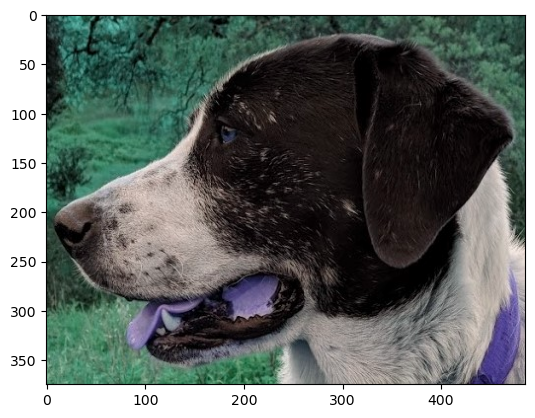

In [4]:
sam=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\sammy_face.jpg")
plt.imshow(sam)

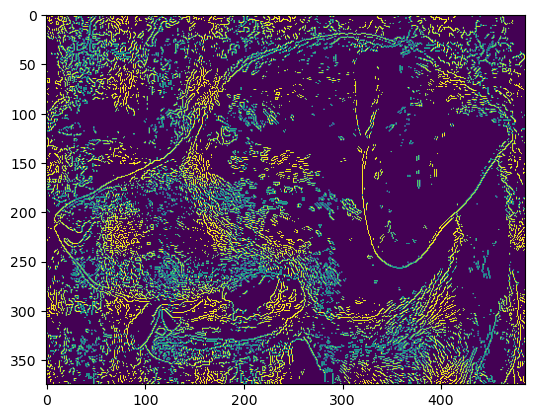

In [6]:
edges=cv2.Canny(image=sam,threshold1=127,threshold2=127)#2 tane eşik değer var ve orta değerler var
plt.imshow(edges) #gürültü olan çoğu kenarı algılıyor 

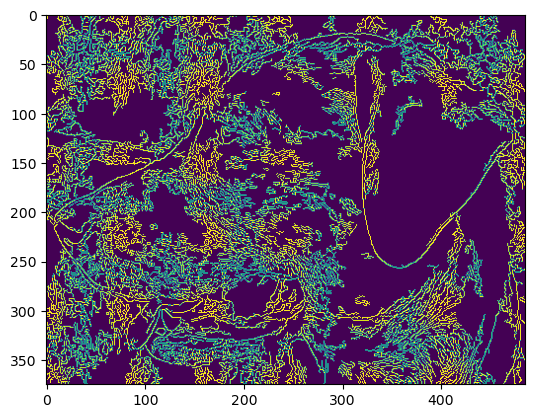

In [7]:
edges=cv2.Canny(image=sam,threshold1=0,threshold2=255)#min max değerler 
plt.imshow(edges) 

In [9]:
med=np.median(sam)
med

64.0

In [12]:
lower=int(max(0,0.7*med))
upper = int(min(255,1.3 * med))
edges = cv2.Canny(image=sam, threshold1=lower , threshold2=upper)

In [ ]:
lower ve upper değişkenleri, Canny algoritması için kullanılan düşük ve yüksek eşik değerleridir.
Bu eşik değerleri, görüntüdeki kenarların tespitinde hangi piksellerin kenar olarak kabul edilip edilmeyeceğini belirler.
Burada, eşik değerleri med (medyan piksel değeri) kullanılarak dinamik olarak hesaplanır


med: Görüntünün piksellerinin medyan değeri (orta parlaklık seviyesindeki piksel).
    
    Bu değeri dinamik olarak kullanmak, farklı görüntülerde daha doğru sonuçlar sağlar.
max(0, 0.7 * med): Düşük eşik değeri, medyan değerin %70'i olarak hesaplanır, ancak 0'dan küçük olmaması için max() fonksiyonu kullanılır.
    
min(255, 1.3 * med_val): Yüksek eşik değeri, medyan değerin %130'u olarak hesaplanır, ancak 255'ten büyük olmaması için min()fonksiyonu kullanılır.
Bu, daha düşük eşik değerlerinin kenarların başlangıcını bulmada, yüksek eşik değerlerinin ise belirgin kenarları 
tespit etmede kullanıldığı bir ayar sağlar.

Medyan değeri kullanmak, görüntünün genel parlaklık seviyesine göre dinamik eşik değerleri belirler.
Bu, farklı parlaklık koşullarına sahip görüntülerde daha tutarlı sonuçlar verir. Örneğin, çok parlak veya çok karanlık
bir görüntüde sabit eşik değerleri kullanmak zordur, ancak medyan değere dayalı eşikler bu durumu düzeltir.

Alt ve üst eşiklerin dinamik olarak hesaplanması, farklı görüntülerde uygun kenarları tespit etmek için daha esnek ve uyumlubir yöntemdir.
Sabit eşik değerleri, her görüntü için aynı sonucu vermeyebilir. Bu nedenle, medyan değerine dayalı bir yöntem, görüntüdeki
kenarların daha doğru tespit edilmesini sağlar.
Sonuç

Bu kod parçası, Canny kenar algılamayı daha akıllı ve uyarlanabilir hale getirir. Görüntüdeki kenarları, 
görüntünün yapısına göre (medyan parlaklık) optimize edilmiş eşik değerleri ile bulmaya çalışır.
Bu da kenarların doğru şekilde tespit edilmesine yardımcı olur.

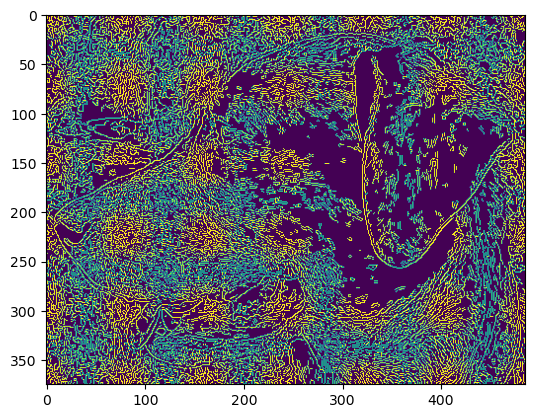

In [13]:
plt.imshow(edges)

In [14]:
lower,upper

(44, 83)

In [15]:
edges = cv2.Canny(image=sam, threshold1=lower , threshold2=upper+50)

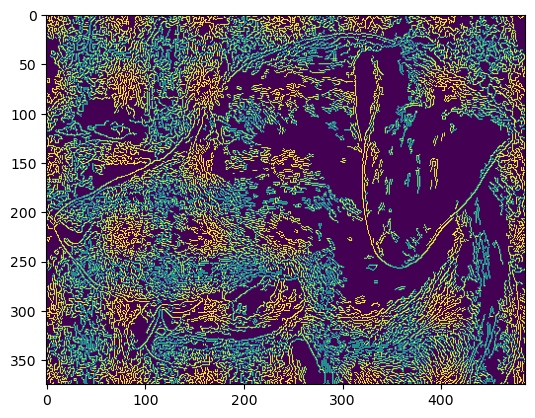

In [16]:
plt.imshow(edges)

In [17]:
blurredimg = cv2.blur(sam,ksize=(5,5))

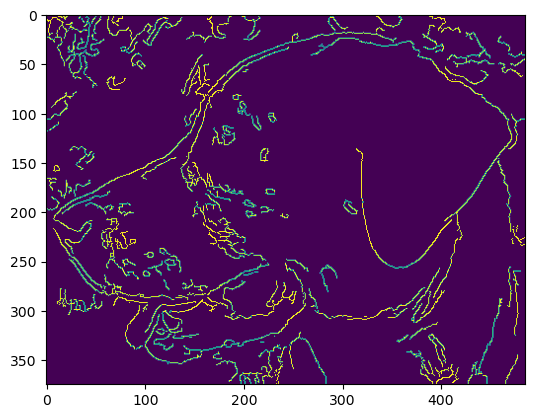

In [18]:
edges = cv2.Canny(image=blurredimg, threshold1=lower , threshold2=upper+50)
plt.imshow(edges)